# Compare Classifiers exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Consider the following three randomly generated datasets using three different generation functions:

* make_classification
* make_moons
* make_circles

In [2]:
# setup datasets
from sklearn.datasets import make_classification, make_moons, make_circles

data_linear = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                                  random_state=3, n_clusters_per_class=1, class_sep=0.5)

data_moons = make_moons(n_samples=300, noise=0.3, random_state=0)

data_circles = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=1)

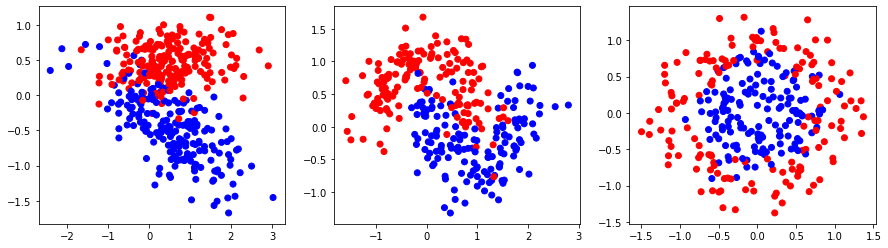

In [3]:
#Plot datasets
plt.figure(figsize=(15,4))
i = 0
for dataset in [data_linear, data_moons, data_circles]:
    X, y = dataset
    i += 1
    plt.subplot(1,3,i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

Compare the decision boundaries of the following classifiers:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from collections import OrderedDict

models = OrderedDict([
          ('Knn 5', KNeighborsClassifier(5)),
          ('Naive Bayes', GaussianNB()),
          ('Logistic Regression', LogisticRegression()),
          ('Linear SVM', SVC(kernel='linear', probability=True)),
          ('Poly SVM', SVC(kernel='poly', degree=2, probability=True)),
          ('RBF SVM', SVC(kernel='rbf', gamma=2, C=1, probability=True)),
          ('Classification Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=50))
          ])

For each Classifier provide the code for the following steps on each of the three datasets (**please, be free to change classifiers' parameters to the best of your knowledge**);

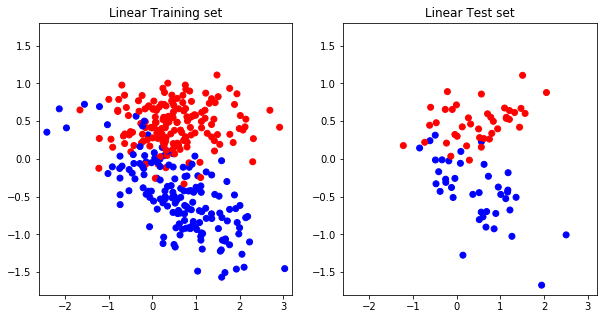

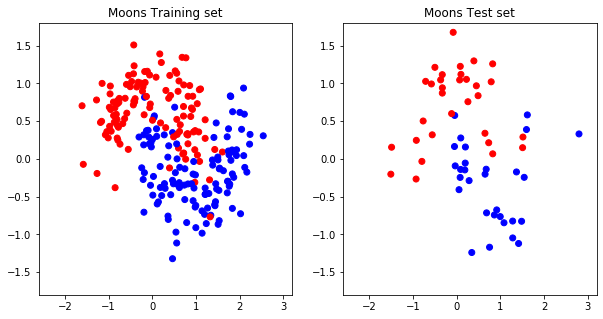

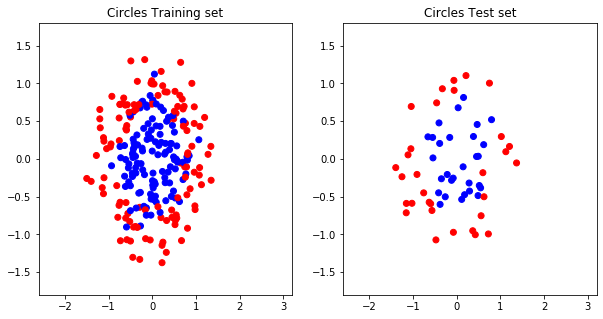

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

acc = []
recc = []
prec = []
cm = []

datasets = {'Linear':data_linear, 'Moons':data_moons, 'Circles':data_circles}

for set in datasets:
    X, y = datasets[set]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    fig = plt.figure(figsize=(10, 5))
    
    plt.subplot(1,2,1)
    plt.title(str(set) +' Training set')
    plt.xlim(-2.6, 3.2)
    plt.ylim(-1.8, 1.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    
    
    plt.subplot(1,2,2)
    plt.title(str(set) +' Test set')
    plt.xlim(-2.6, 3.2)
    plt.ylim(-1.8, 1.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
    
    for counter, model in enumerate(models.values()):
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        recc.append(recall_score(y_test, y_pred))
        prec.append(precision_score(y_test, y_pred))
        cm.append(confusion_matrix(y_test, y_pred))


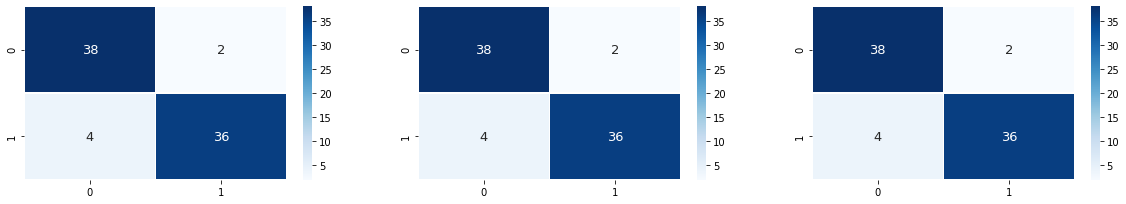

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(20, 30))
for i in range(len(datasets)):
    i += 1
    for j, model in enumerate(models.values()):
        j += 1
        plt.subplot(j,3,i)
        sns.heatmap(cm[0], 
            annot=True, 
            linewidths=.5, 
            cmap='Blues',
            annot_kws={"fontsize":13})

In [7]:
def mesh_graph(X_train, y_train, counter):
   
    X_set, y_set = X_train, y_train

    # generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

    # classifies every pixel as 0 or 1
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.2, cmap=ListedColormap(('red', 'green')))

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(['red', 'green'])(i), label=j)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title(str(list(models.keys())[counter]))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


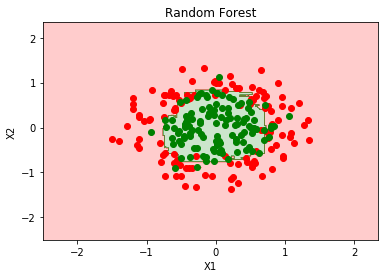

In [8]:
mesh_graph(X_train, y_train, counter)

In [9]:
import pandas as pd
df_lin = pd.DataFrame(data= [], columns = ['Accuracy', 'Recall', 'Precision'], index=list(models.keys()))
df_lin['Accuracy'] = acc[0:8]
df_lin['Recall'] = recc[0:8]
df_lin['Precision'] = prec[0:8]

In [10]:
df_moon = pd.DataFrame(data= [], columns = ['Accuracy', 'Recall', 'Precision'], index=list(models.keys()))
df_moon['Accuracy'] = acc[8:16]
df_moon['Recall'] = recc[8:16]
df_moon['Precision'] = prec[8:16]

In [11]:
df_circle = pd.DataFrame(data= [], columns = ['Accuracy', 'Recall', 'Precision'], index=list(models.keys()))
df_circle['Accuracy'] = acc[16:24]
df_circle['Recall'] = recc[16:24]
df_circle['Precision'] = prec[16:24]

In [12]:
df = pd.concat([df_lin, df_moon], axis=1, keys=['Linear', 'Moon', 'Circle'])
results = pd.concat([df, df_circle], axis=1)
results

,"(Linear, Accuracy)","(Linear, Recall)","(Linear, Precision)","(Moon, Accuracy)","(Moon, Recall)","(Moon, Precision)",Accuracy,Recall,Precision
Knn 5,0.9250,0.900,0.947368,0.950000,0.965517,0.933333,0.900000,0.931034,0.870968
Naive Bayes,0.9250,0.875,0.972222,0.866667,0.862069,0.862069,0.950000,0.931034,0.964286
Logistic Regression,0.9125,0.900,0.923077,0.866667,0.862069,0.862069,0.516667,0.827586,0.500000
Linear SVM,0.9125,0.900,0.923077,0.866667,0.862069,0.862069,0.483333,1.000000,0.483333
Poly SVM,0.7125,0.600,0.774194,0.600000,0.413793,0.631579,0.966667,0.965517,0.965517
RBF SVM,0.9125,0.875,0.945946,0.966667,1.000000,0.935484,0.933333,0.896552,0.962963
Classification Tree,0.9125,0.875,0.945946,0.983333,0.965517,1.000000,0.900000,0.896552,0.896552
Random Forest,0.9250,0.900,0.947368,0.950000,0.965517,0.933333,0.916667,0.896552,0.928571


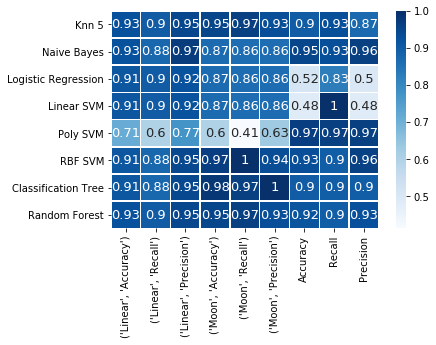

In [13]:
sns.heatmap(results, 
            annot=True, 
            linewidths=.5, 
            cmap='Blues',
            annot_kws={"fontsize":13})